## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


## Importing data

In [3]:
data=pd.read_csv("age_bmi_prediction.csv")
print(data.head())

   Age  Height  Weight  Gender    BMI
0   56    1.79  108.01       0  33.82
1   69    1.58   55.83       0  22.30
2   46    1.77   97.48       1  31.28
3   32    1.61   83.28       0  32.03
4   60    1.58   66.01       0  26.42


## Basic Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1000 non-null   int64  
 1   Height  1000 non-null   float64
 2   Weight  1000 non-null   float64
 3   Gender  1000 non-null   int64  
 4   BMI     1000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


## Data Cleaning

## Empty cells

In [5]:
data.isna().sum()

Age       0
Height    0
Weight    0
Gender    0
BMI       0
dtype: int64

### Check Duplicates

In [6]:
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  0


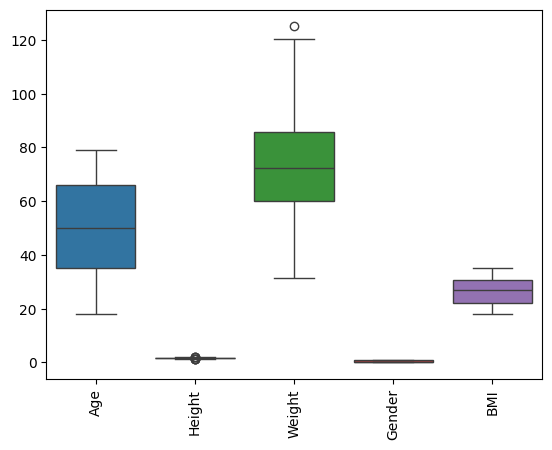

In [7]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## Encoding Categorial Data

In [8]:
categ_col = data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

encoded_data = data.copy()
for i in categ_col:
    encoded_data[i] = label_encoder.fit_transform(data[i])

print(encoded_data.head())

   Age  Height  Weight  Gender    BMI
0   56    1.79  108.01       0  33.82
1   69    1.58   55.83       0  22.30
2   46    1.77   97.48       1  31.28
3   32    1.61   83.28       0  32.03
4   60    1.58   66.01       0  26.42


## Extract Dependent and Independent Variables

In [10]:
X = encoded_data.iloc[:,0:11]   
y = encoded_data['BMI']     

## ## Statistical Analysis
### (Correlation,Describe) 

In [11]:
print(data.describe())

               Age       Height       Weight       Gender          BMI
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean     49.857000     1.654570    73.121310     0.469000    26.571220
std      18.114267     0.106813    17.029999     0.499288     4.971108
min      18.000000     1.290000    31.550000     0.000000    18.000000
25%      35.000000     1.590000    60.050000     0.000000    22.117500
50%      50.000000     1.660000    72.200000     0.000000    26.865000
75%      66.000000     1.730000    85.560000     1.000000    30.822500
max      79.000000     1.970000   125.070000     1.000000    35.000000


          Age  Height  Weight  Gender    BMI
Age     1.000  -0.002   0.010   0.012  0.013
Height -0.002   1.000   0.586   0.017  0.046
Weight  0.010   0.586   1.000   0.022  0.829
Gender  0.012   0.017   0.022   1.000  0.013
BMI     0.013   0.046   0.829   0.013  1.000


<Axes: >

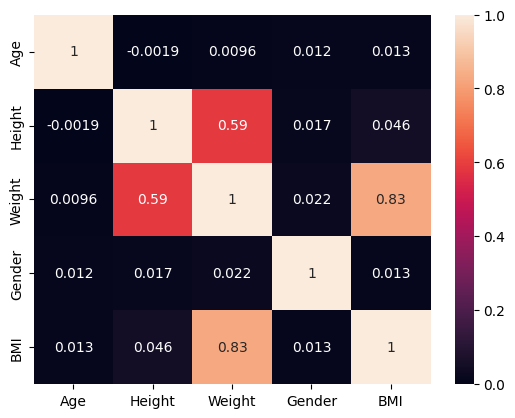

In [12]:
correlation=encoded_data.corr(numeric_only=True)
print(np.around(correlation,decimals=3))
sns.heatmap(correlation,annot=True)

## Split Train and Test Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred=np.around(y_pred)

data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(data)

     Actual  Predicted
521   25.46       25.0
737   30.96       31.0
740   32.82       33.0
660   26.12       26.0
411   29.06       29.0
..      ...        ...
408   31.73       32.0
332   18.57       19.0
208   33.46       33.0
613   28.98       29.0
78    34.63       35.0

[200 rows x 2 columns]


In [15]:

score = r2_score(y_test,y_pred)
print("r2 score is ", score*100,"%")

r2 score is  99.642453036536 %
